### REMOVED because it may be too much info, too detailed, to include in a report
Of the ~114,000 records, there are numerous features that represent a small portion of the dataset. TotalProsperLoans, TotalProsperPaymentsBilled, & OnTimeProsperPayments to name a few. The missing data may be an issue if these variables become useful in analysing the data.<br> For example, out of 114,000 records, there are only ~29,000 records that contain data for CreditGrade and ~85,000 "ProsperRating (Alpha)" values <br>


### Creating a new datafrome with only pastdue data by removing 'Completed' & 'Current'
> Instead created several pastdue DFs and appended them together

In [17]:
loanDF3 = loanDF.copy()

In [48]:
# Create index of items to drop from dataframe
# and LoanStatus == "Current"
completed = loanDF3.query('LoanStatus == "Completed"').index
current = loanDF3.query('LoanStatus == "Current"').index
#CompletedCurrent = completed + current --> I think this is adding each value together instead of merging the 2 datasets


In [23]:
# Drop/remove all loans that are designated 'current' or 'completed'
# The sample offers a rough review to check if intended rows were dropped/removed

loanDF3.drop(completed, inplace=True)
loanDF3.drop(current, inplace=True)
loanDF3.sample(15)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
92767,AEF333908387099615547C3,146679,2007-06-04 13:58:35.370000000,D,36,Chargedoff,2008-02-13 00:00:00,0.2048,0.1975,0.1775,NaN,NaN,NaN,NaN,NaN,NaN,0,CA,Other,Full-time,62.0000,False,True,223133764057631067F3FD8,2007-05-22 18:21:37.710000000,600.0000,619.0000,1990-12-11 00:00:00,10.0000,10.0000,16.0000,8,346.0000,8.0000,16.0000,1.0000,1234.0000,3.0000,0.0000,0.0000,4320.0000,0.9600,112.0000,16.0000,0.8100,0.0000,0.1800,"$25,000-49,999",True,3466.6667,D51E339168560654449444B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2338,8.0000,81,16088,6500,2007-06-15 00:00:00,Q2 2007,274A338851160205149895D,240.7400,791.1800,405.4300,385.7500,-16.0400,-6.2500,6094.5700,6094.5700,0.0000,1.0000,0,0,0.0000,150
48976,B2693422324970359030485,341064,2008-05-29 10:15:09.413000000,D,36,Chargedoff,2010-06-11 00:00:00,0.3745,0.3500,0.3400,NaN,NaN,NaN,NaN,NaN,NaN,4,NH,Other,Retired,68.0000,False,False,NaN,2008-05-22 09:03:16.680000000,600.0000,619.0000,1994-10-17 00:00:00,4.0000,3.0000,17.0000,1,0.0000,2.0000,6.0000,3.0000,133.0000,8.0000,1.0000,0.0000,0.0000,0.0000,0.0000,13.0000,0.5600,1.0000,2.9900,"$1-24,999",True,166.6667,6739342255625095158E25B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489,25.0000,69,32579,3000,2008-06-10 00:00:00,Q2 2008,E8593416163780631CCC4B2,135.7100,2578.4900,1198.3500,1380.1400,-39.4300,0.0000,1801.6500,1801.6500,0.0000,1.0000,0,0,0.0000,12
21711,F88C34245065324751F377F,349788,2008-06-12 22:09:32.670000000,A,36,Chargedoff,2009-06-26 00:00:00,0.2350,0.2200,0.2100,NaN,NaN,NaN,NaN,NaN,NaN,3,NJ,Other,Self-employed,29.0000,True,False,NaN,2008-06-04 13:17:37.983000000,720.0000,739.0000,1992-09-01 00:00:00,19.0000,18.0000,42.0000,14,533.0000,1.0000,15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23965.0000,0.5500,18935.0000,40.0000,0.8000,0.0000,NaN,NaN,False,0.0000,59E93423508939202BD0243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1839,13.0000,69,33342,15000,2008-06-25 00:00:00,Q2 2008,FDD734230533485616268F3,572.8600,4010.0200,2193.9000,1816.1200,-82.5500,0.0000,12806.1000,12806.1000,0.0000,1.0000,1,1,100.0000,253
70181,C05333785627629792AC7C3,85698,2007-01-16 21:42:32.100000000,HR,36,Chargedoff,2009-05-31 00:00:00,0.2676,0.2600,0.2550,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Not available,NaN,False,True,NaN,2007-01-16 21:33:57.950000000,520.0000,539.0000,1966-04-02 00:00:00,NaN,NaN,21.0000,3,35.0000,3.0000,11.0000,1.0000,NaN,65.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0900,Not displayed,True,15

In [ ]:
# Bin resizing, to transform the x-axis    
#bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(loanDF['ListingCategory (numeric)'], bins=20)

# Identify the tick-locations
tick_locs = np.arange(0, 21, 1)

# Apply x-ticks
plt.xticks(tick_locs, [str(x) for x in np.arange(0,21,1)]);

In [ ]:
# Show histogram of Loan Categories

g = sb.distplot(loanDF['ListingCategory (numeric)'])
g.set(xticks=np.arange(0,21,1));

#g.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#g.set_xticklabels([str(x) for x in np.arange(0,21,1)]);

In [ ]:
# Create a new figure
fig2 = plt.figure()

# 1 row, 2 cols, subplot 1
#plt.subplot(1,2,1)

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax5 = fig2.add_axes([0.125, 0.125, 0.775, 0.775], label='6th axes')

ax5.hist(data=loanDF, x='ListingCategory (numeric)');

ax5.set_xlabel('Listing Categories (numeric)')
ax5.set_ylabel('Count')
ax5.set(xticks=np.arange(0,21,1));

#ax5.set_xticks()

In [ ]:
plt.hist(data=loanDF3, x='LoanStatus')
plt.xticks(rotation=90)

In [38]:
allpast_csrl = all_past.CreditScoreRangeLower.value_counts()

In [39]:
allpast_csrl = allpast_csrl.to_frame()
allpast_csrl

,CreditScoreRangeLower
660.0000,181
680.0000,175
700.0000,149
640.0000,126
720.0000,117
740.0000,84
760.0000,57
620.0000,33
600.0000,26
780.0000,20


In [40]:
allpast_csrl['ScoreLower'] = allpast_csrl.index
allpast_csrl.rename(columns={'CreditScoreRangeLower':'Count'},inplace=True)
allpast_csrl

,Count,ScoreLower
660.0000,181,660.0000
680.0000,175,680.0000
700.0000,149,700.0000
640.0000,126,640.0000
720.0000,117,720.0000
740.0000,84,740.0000
760.0000,57,760.0000
620.0000,33,620.0000
600.0000,26,600.0000
780.0000,20,780.0000


In [41]:
allpast_csrl = allpast_csrl.reset_index()
allpast_csrl

,index,Count,ScoreLower
0,660.0000,181,660.0000
1,680.0000,175,680.0000
2,700.0000,149,700.0000
3,640.0000,126,640.0000
4,720.0000,117,720.0000
5,740.0000,84,740.0000
6,760.0000,57,760.0000
7,620.0000,33,620.0000
8,600.0000,26,600.0000
9,780.0000,20,780.0000


In [42]:
allpast_csrl.drop(['index'], axis=1, inplace=True)

In [43]:
allpast_csrl

,Count,ScoreLower
0,181,660.0000
1,175,680.0000
2,149,700.0000
3,126,640.0000
4,117,720.0000
5,84,740.0000
6,57,760.0000
7,33,620.0000
8,26,600.0000
9,20,780.0000


(array([[7., 3., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 3., 4., 5.]]),
 array([ 11. ,  91.9, 172.8, 253.7, 334.6, 415.5, 496.4, 577.3, 658.2,
        739.1, 820. ]),
 <a list of 2 BarContainer objects>)

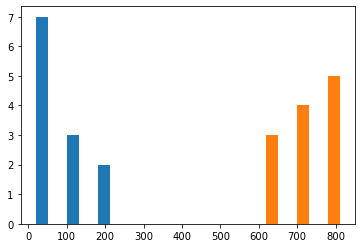

In [44]:
plt.hist(allpast_csrl)

(array([4., 1., 1., 0., 1., 0., 2., 0., 1., 2.]),
 array([ 11.,  28.,  45.,  62.,  79.,  96., 113., 130., 147., 164., 181.]),
 <BarContainer object of 10 artists>)

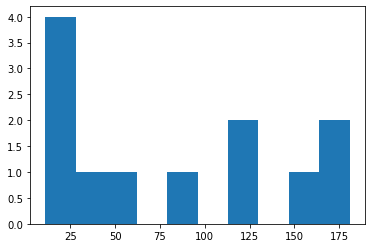

In [79]:
plt.hist(all_past.CreditScoreRangeLower.value_counts())